In [1]:
#Necessary Imports

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn.metrics import confusion_matrix

In [2]:
#Read the data from the dataset
data = pd.read_csv('data.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [4]:
#check if the data is null
data.isnull().sum() 

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
#rename the dignosis column as label
data = data.rename(columns={'diagnosis':'label'})
data.dtypes


id                           int64
label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<AxesSubplot: xlabel='label', ylabel='count'>

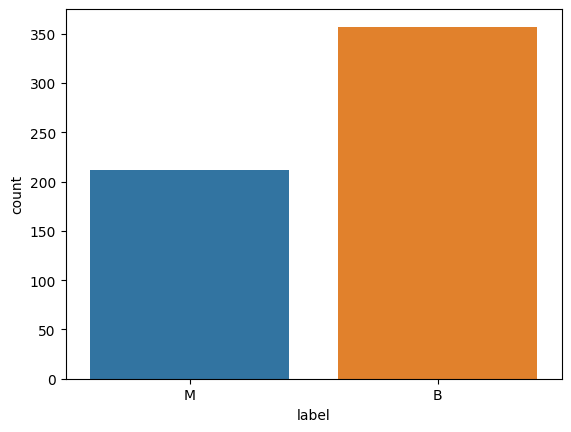

In [6]:
sns.countplot(x='label', data=data)

In [23]:
#encode text values for malignant and benign into 0 and 1
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
print(np.unique(y))

[0 1]


In [8]:
# set values for x 
x = data.drop(labels = ['label','id'], axis=1)
copy = x
print(copy.describe().T)

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

<AxesSubplot: title={'center': 'Data After Scaling'}, xlabel='perimeter_mean', ylabel='concavity_mean'>

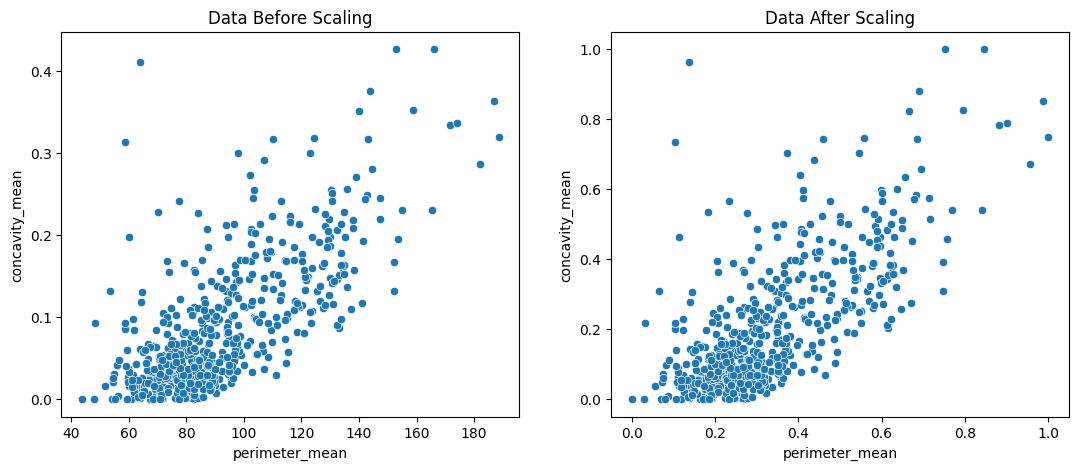

In [9]:
#plot the scaled data
sc = MinMaxScaler()
scaled_copy = pd.DataFrame(sc.fit_transform(copy.values),columns=copy.columns, index=copy.index)

fig, ax = plt.subplots(1,2,figsize=(13,5))

ax[0].set_title('Data Before Scaling')
sns.scatterplot(data=copy , x='perimeter_mean' , y ='concavity_mean',ax=ax[0])

ax[1].set_title('Data After Scaling')
sns.scatterplot(data=scaled_copy , x='perimeter_mean' , y ='concavity_mean',ax=ax[1])


In [10]:
print (scaled_copy.describe().T)

                         count      mean       std  min       25%       50%  \
radius_mean              569.0  0.338222  0.166787  0.0  0.223342  0.302381   
texture_mean             569.0  0.323965  0.145453  0.0  0.218465  0.308759   
perimeter_mean           569.0  0.332935  0.167915  0.0  0.216847  0.293345   
area_mean                569.0  0.216920  0.149274  0.0  0.117413  0.172895   
smoothness_mean          569.0  0.394785  0.126967  0.0  0.304595  0.390358   
compactness_mean         569.0  0.260601  0.161992  0.0  0.139685  0.224679   
concavity_mean           569.0  0.208058  0.186785  0.0  0.069260  0.144189   
concave points_mean      569.0  0.243137  0.192857  0.0  0.100944  0.166501   
symmetry_mean            569.0  0.379605  0.138456  0.0  0.282323  0.369697   
fractal_dimension_mean   569.0  0.270379  0.148702  0.0  0.163016  0.243892   
radius_se                569.0  0.106345  0.100421  0.0  0.043781  0.077023   
texture_se               569.0  0.189324  0.121917  

In [11]:
#scale the x data
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [24]:
#split the dataset into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state=42)
print (x_train.shape,x_test.shape)

(426, 30) (143, 30)


In [21]:
#architecture of the model
model =Sequential()

model.add(Dense(50,input_dim = 30,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(50,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss ='binary_crossentropy', 
              optimizer = 'adam'  ,
              metrics = ['accuracy'])

print (model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                1550      
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 4,151
Trainable params: 4,151
Non-traina

In [22]:
#training of the model 
history = model.fit (x_train,y_train, verbose=1,epochs=100,batch_size =64
                     ,validation_data=(x_test,y_test))

Epoch 1/100
7/7 [==============================] - 1s 23ms/step - loss: 0.6719 - accuracy: 0.6408 - val_loss: 0.6478 - val_accuracy: 0.6224
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6364 - accuracy: 0.7042 - val_loss: 0.6168 - val_accuracy: 0.7273
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6161 - accuracy: 0.7394 - val_loss: 0.5866 - val_accuracy: 0.7692
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5986 - accuracy: 0.7700 - val_loss: 0.5557 - val_accuracy: 0.8042
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5681 - accuracy: 0.8028 - val_loss: 0.5215 - val_accuracy: 0.8182
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5363 - accuracy: 0.8122 - val_loss: 0.4824 - val_accuracy: 0.8671
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5065 - accuracy: 0.8310 - val_loss: 0.4404 - val_accuracy: 0.8881
Epoch 8/100
7/7 [=========

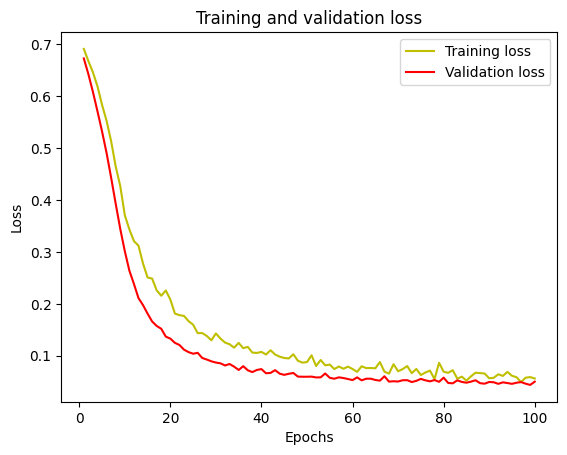

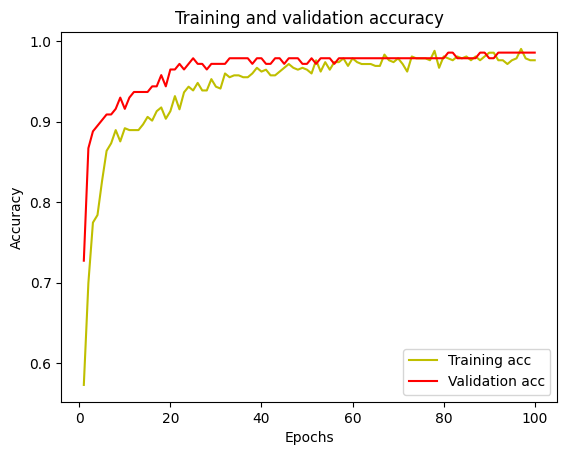

In [17]:
#code to plot the results from
#https://colab.research.google.com/drive/1WEZxybgoxQz8Lmp_r6Zq6OHYdvwaz2Df?usp=sharing
#plot the results


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  
val_acc = history.history['val_accuracy'] 
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 0s 1ms/step


<AxesSubplot: >

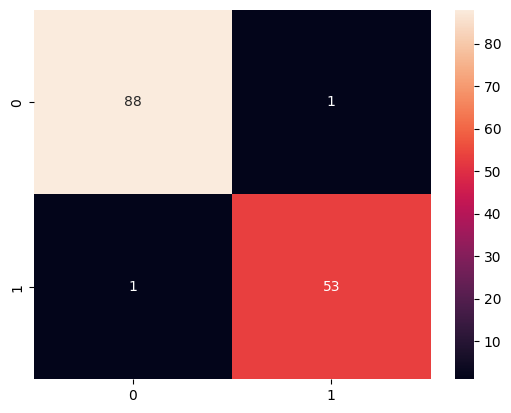

In [27]:
#heatmap of confusion matrix

y_prediction = model.predict(x_test) 
y_prediction = (y_prediction>0.5)

cm = confusion_matrix(y_test,y_prediction)

sns.heatmap(cm, annot =True)